<a href="https://colab.research.google.com/github/jtlai0921/-/blob/master/keras_01basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
# import keras
from keras.datasets import mnist
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Input, Activation, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

num_classes = 10
IMG_SIZE = 28

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
7


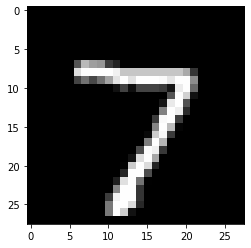

In [2]:
# Prepare Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# Plot image and label
plt.imshow(x_test[0], cmap=plt.cm.gray)
print(y_test[0])

In [3]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
# normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [4]:
img = x_train[0]
label = y_train[0]
print(img, img.shape, label)

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

### Build Model

In [5]:
# 1
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 1))
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = Conv2D(16, (3, 3), activation=keras.activations.relu)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation=keras.activations.relu)(x)
x = Conv2D(32, (3, 3), activation=keras.activations.relu)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
prediction = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=prediction)

In [6]:
# 2
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), activation=keras.activations.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation (Activation)      (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

### Train

In [9]:
logs = model.fit(x_train, y_train,
                batch_size=128,
                epochs=10,
                verbose=1,
                validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 12s 11ms/step - loss: 0.3946 - accuracy: 0.8744 - val_loss: 0.0576 - val_accuracy: 0.9814
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0456 - accuracy: 0.9855 - val_loss: 0.0319 - val_accuracy: 0.9882
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0245 - val_accuracy: 0.9910
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0397 - val_accuracy: 0.9880
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0535 - val_accuracy: 0.9849
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0106 - accuracy: 0.9962 - val_loss: 0.0308 - val_accuracy: 0.9906
Epoch 7/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0320 - val_accuracy: 0.990

### Evaluation

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'test loss: {score[0]}, test acc: {score[1]}')
score

test loss: 0.03995537385344505, test acc: 0.9889000058174133


[0.03995537385344505, 0.9889000058174133]

In [11]:
prediction = model.predict(x_test[:1])
print(prediction)
print(np.argmax(prediction))

[[4.6769091e-09 2.4754925e-09 7.4411355e-07 1.8838500e-05 8.9409165e-09
  2.1063638e-09 3.3085225e-12 9.9998033e-01 1.5613042e-08 1.2710800e-07]]
7


### training history

In [12]:
history = logs.history
history

{'accuracy': [0.9485666751861572,
  0.98621666431427,
  0.9910333156585693,
  0.9939333200454712,
  0.994949996471405,
  0.9962166547775269,
  0.996649980545044,
  0.9972000122070312,
  0.9974666833877563,
  0.9981499910354614],
 'loss': [0.1643553078174591,
  0.04432011395692825,
  0.029181508347392082,
  0.018851643428206444,
  0.015971550717949867,
  0.011536067351698875,
  0.010090747848153114,
  0.009023884311318398,
  0.007877439260482788,
  0.005683000665158033],
 'val_accuracy': [0.9814000129699707,
  0.9882000088691711,
  0.9909999966621399,
  0.9879999756813049,
  0.9848999977111816,
  0.9905999898910522,
  0.9905999898910522,
  0.9894999861717224,
  0.9907000064849854,
  0.9889000058174133],
 'val_loss': [0.05763418599963188,
  0.03188725560903549,
  0.02447374165058136,
  0.03969466686248779,
  0.05351373180747032,
  0.030812595039606094,
  0.032017312943935394,
  0.03791435435414314,
  0.03234393149614334,
  0.03995537385344505]}

Text(0.5, 1.0, 'accuracy')

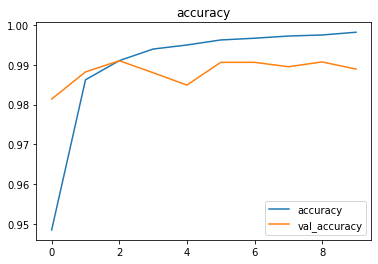

In [13]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

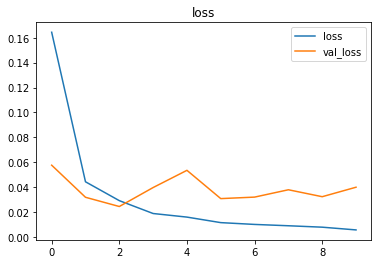

In [14]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

### Analysis

In [15]:
y_test.shape

(10000, 10)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = y_test # np.argmax(y_test, axis=-1)
y_pred = np.argmax(model.predict(x_test), axis=-1)
print(y_true.shape, y_pred.shape)
target_names = [str(i) for i in range(10)]
print(classification_report(y_true, y_pred, target_names=target_names))
print(confusion_matrix(y_true, y_pred))


(10000, 10) (10000,)


ValueError: ignored

## Save Model

In [18]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
prediction = model.predict(x_test[:1])
print(prediction)

model.save('/content/drive/My Drive/my_model.h5')
del model
model = load_model('/content/drive/My Drive/my_model.h5')
prediction = model.predict(x_test[:1])
print(prediction)

[[4.6769091e-09 2.4754925e-09 7.4411355e-07 1.8838500e-05 8.9409165e-09
  2.1063638e-09 3.3085225e-12 9.9998033e-01 1.5613042e-08 1.2710800e-07]]
[[4.6769091e-09 2.4754925e-09 7.4411355e-07 1.8838500e-05 8.9409165e-09
  2.1063638e-09 3.3085225e-12 9.9998033e-01 1.5613042e-08 1.2710800e-07]]


In [20]:
# save and load weights only
model.save_weights('/content/drive/My Drive/my_model_weights.h5')
# reconstruct model before load weights
model.load_weights('/content/drive/My Drive/my_model_weights.h5')